In [1]:
# Paso 1: Análisis exploratorio de datos
#cargar librerias
import pandas as pd #
import numpy as np #
import seaborn as sns #
import matplotlib.pyplot as plt #

#libresisas para implementae modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression #libreria para regresion lineal
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [2]:
#lectura de datos
datos_vino = pd.read_csv('./winequality-red.csv')

In [3]:
# Paso 2: Preprocesamiento de datos
# Explorar el dataset
print("Información del dataset:")
print(datos_vino.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


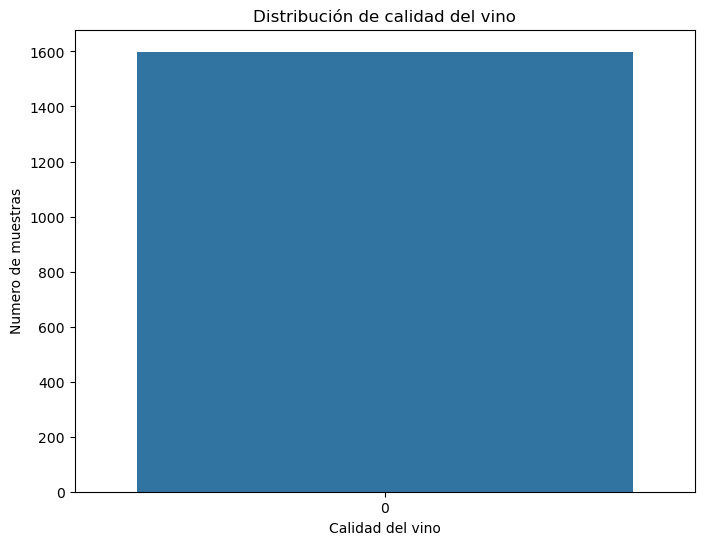

In [16]:
# Paso 3: Selección de características relevantes
# Explorar la distribución de la variable objetivo (quality)
plt.figure(figsize=(8, 6))
sns.countplot(datos_vino['quality'])
plt.title('Distribución de calidad del vino')
plt.xlabel('Calidad del vino')
plt.ylabel('Numero de muestras')
plt.show()

In [5]:
# Paso 4: Dividir el dataset en Train y Test
# Dividir el dataset en características (X) y variable objetivo (y)
X = datos_vino.drop('quality', axis=1)
y = datos_vino['quality']

In [6]:
# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
# Paso 5: Entrenar el modelo
# Instanciar y entrenar el modelo de árbol de decisión
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
# Realizar predicciones sobre el conjunto de prueba
y_pred = modelo.predict(X_test)

In [20]:
# Paso 6: Evaluar el desempeño del modelo
# Evaluar el modelo
valor_exacto = accuracy_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
clasificacion = classification_report(y_test, y_pred)

print("\nvisualizamos el valor de la Exactitud:", valor_exacto)
print("\nMatriz de confusión:")
print(matrix)
print("\nReporte de clasificación:")
print(clasificacion)


visualizamos el valor de la Exactitud: 0.5825

Matriz de confusión:
[[  0   1   0   0   0   0]
 [  0   1   5   6   1   0]
 [  2   5 113  36   8   0]
 [  0   7  46  91  23   2]
 [  0   1   3  13  28   3]
 [  0   0   1   1   3   0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.08      0.07        13
           5       0.67      0.69      0.68       164
           6       0.62      0.54      0.58       169
           7       0.44      0.58      0.50        48
           8       0.00      0.00      0.00         5

    accuracy                           0.58       400
   macro avg       0.30      0.31      0.31       400
weighted avg       0.59      0.58      0.59       400



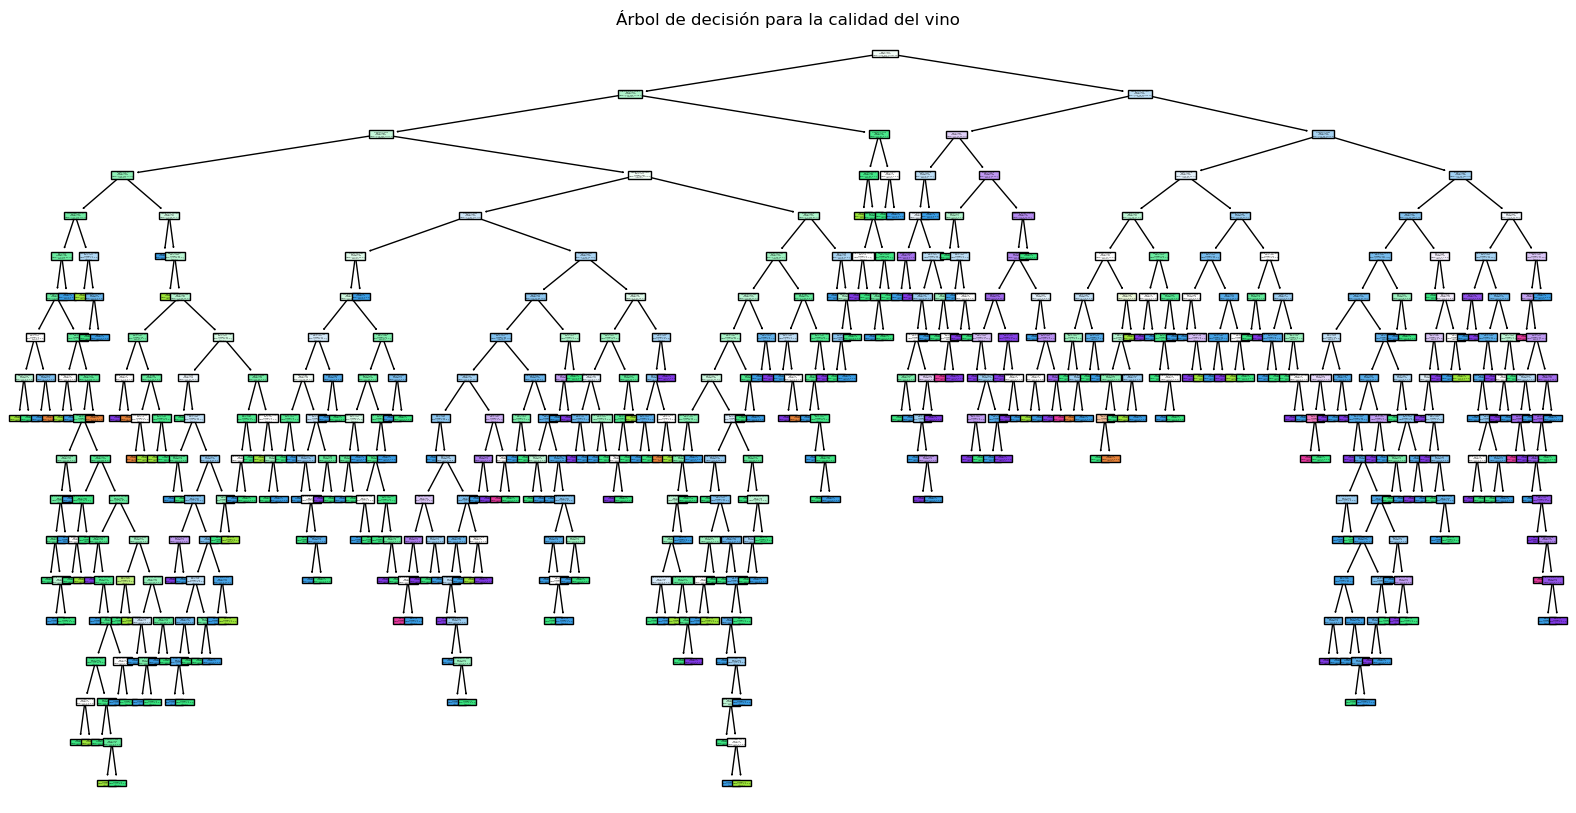

In [24]:
# Paso 7: Visualizar los resultados
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(modelo, feature_names=X.columns, class_names=np.unique(y).astype(str), filled=True)
plt.title('Árbol de decisión para la calidad del vino')
plt.show()

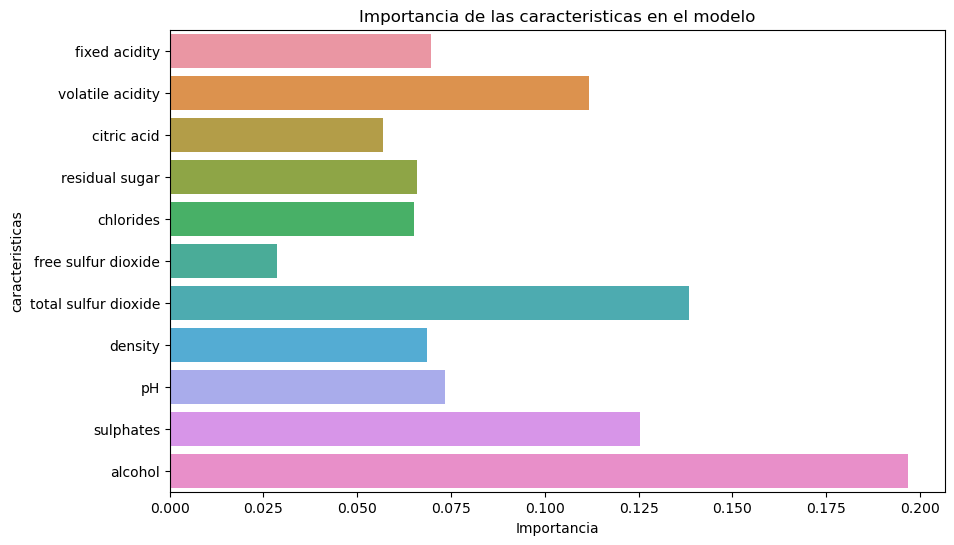

In [28]:
# Paso 7: Visualizar los resultados
# Visualizar la importancia de las características
importancia = modelo.feature_importances_
funciones = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names)
plt.title('Importancia de las caracteristicas en el modelo')
plt.xlabel('Importancia')
plt.ylabel('caracteristicas')
plt.show()

In [26]:
# Paso 8: Interpretar, analizar y documentar los resultados obtenidos